# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# !pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #lower range, upper range, how many numbers
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #equal likely change to chose the same numbers. uniform distribution
lat_lngs = zip(lats, lngs) #puts it into pair like "zipper" them together, taking two lists and putting into one list

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
city_url = url + "&q=" + cities[0] 

city_weather = requests.get(city_url).json()


city_weather

{'coord': {'lon': 70.2167, 'lat': -49.35},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 37.71,
  'feels_like': 25.11,
  'temp_min': 37.71,
  'temp_max': 37.71,
  'pressure': 1009,
  'humidity': 76,
  'sea_level': 1009,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 31.9, 'deg': 248, 'gust': 37.49},
 'clouds': {'all': 73},
 'dt': 1690058495,
 'sys': {'country': 'TF', 'sunrise': 1690081248, 'sunset': 1690113003},
 'timezone': 18000,
 'id': 1546102,
 'name': 'Port-aux-Français',
 'cod': 200}

In [5]:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
#make sure to put api key {} so it knows to bring it in and the f at the beginning

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | dickinson
Processing Record 3 of Set 1 | bestobe
Processing Record 4 of Set 1 | luanda
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | cam ranh
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | princeville
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | altamira
Processing Record 13 of Set 1 | contamana
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | seogwipo
City not found. Skipping...
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | al kharijah
Processing Record 20 of Set 1 | tchibanga
Processing Record 21 of Set 1 | moranbah
Pr

Processing Record 37 of Set 4 | qaryat suluq
Processing Record 38 of Set 4 | gurmatkal
Processing Record 39 of Set 4 | lihue
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | ta`u
Processing Record 43 of Set 4 | dul'durga
Processing Record 44 of Set 4 | kingscliff
Processing Record 45 of Set 4 | akureyri
Processing Record 46 of Set 4 | fort bragg
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | vangaindrano
Processing Record 49 of Set 4 | togur
Processing Record 0 of Set 5 | yongfeng
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | elmendorf air force base
City not found. Skipping...
Processing Record 3 of Set 5 | notodden
Processing Record 4 of Set 5 | aoulef
Processing Record 5 of Set 5 | torghay
Processing Record 6 of Set 5 | slave lake
Processing Record 7 of Set 5 | laiyang
Processing Record 8 of Set 5 | lagunas
Processing Record 9 of Set 5 | selfoss
Processing Reco

Processing Record 29 of Set 8 | porbandar
Processing Record 30 of Set 8 | sao vicente
Processing Record 31 of Set 8 | saguenay
Processing Record 32 of Set 8 | ballalpur
Processing Record 33 of Set 8 | rtishchevo
Processing Record 34 of Set 8 | reggane
Processing Record 35 of Set 8 | emerald
Processing Record 36 of Set 8 | panaba
Processing Record 37 of Set 8 | sandnessjoen
Processing Record 38 of Set 8 | kerikeri
Processing Record 39 of Set 8 | mar del plata
Processing Record 40 of Set 8 | itacare
Processing Record 41 of Set 8 | lijiang
Processing Record 42 of Set 8 | sarakhs
Processing Record 43 of Set 8 | salaya
Processing Record 44 of Set 8 | dunay
Processing Record 45 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 46 of Set 8 | rosarito
Processing Record 47 of Set 8 | magadan
Processing Record 48 of Set 8 | codrington
Processing Record 49 of Set 8 | toga village
City not found. Skipping...
Processing Record 0 of Set 9 | arteche
Processing Record 1 of Set 

Processing Record 14 of Set 12 | nakuru
Processing Record 15 of Set 12 | ojinaga
Processing Record 16 of Set 12 | alofi
Processing Record 17 of Set 12 | live oak
Processing Record 18 of Set 12 | culfa
Processing Record 19 of Set 12 | qulsary
Processing Record 20 of Set 12 | leninskoye
Processing Record 21 of Set 12 | taltal
Processing Record 22 of Set 12 | lorengau
Processing Record 23 of Set 12 | caleta de carquin
Processing Record 24 of Set 12 | kyzyl-mazhalyk
Processing Record 25 of Set 12 | paracuru
Processing Record 26 of Set 12 | smach mean chey
City not found. Skipping...
Processing Record 27 of Set 12 | suntar
Processing Record 28 of Set 12 | lent'ekhi
Processing Record 29 of Set 12 | manakara
Processing Record 30 of Set 12 | yuzhno-kurilsk
Processing Record 31 of Set 12 | talitsy
Processing Record 32 of Set 12 | port shepstone
Processing Record 33 of Set 12 | harnai
Processing Record 34 of Set 12 | puerto cabezas
Processing Record 35 of Set 12 | kenora
Processing Record 36 of 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,37.71,76,73,31.90,TF,1690058495
1,dickinson,29.4608,-95.0513,101.08,56,75,6.91,US,1690058496
2,bestobe,52.4994,73.0975,71.44,44,72,4.23,KZ,1690058496
3,luanda,-8.8368,13.2343,71.60,83,75,8.05,AO,1690058496
4,iqaluit,63.7506,-68.5145,46.13,87,100,4.61,CA,1690058497


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,37.71,76,73,31.90,TF,1690058495
1,dickinson,29.4608,-95.0513,101.08,56,75,6.91,US,1690058496
2,bestobe,52.4994,73.0975,71.44,44,72,4.23,KZ,1690058496
3,luanda,-8.8368,13.2343,71.60,83,75,8.05,AO,1690058496
4,iqaluit,63.7506,-68.5145,46.13,87,100,4.61,CA,1690058497


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

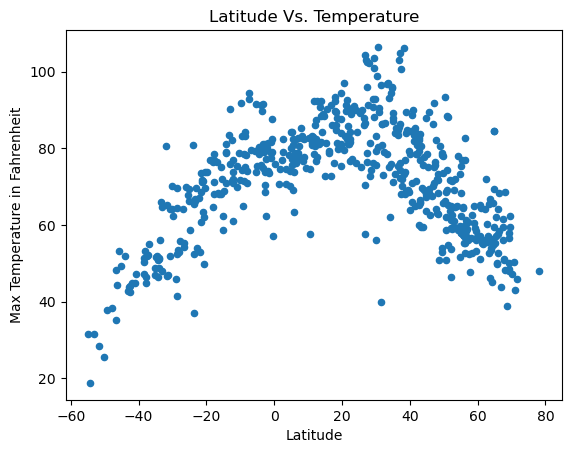

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = "Lat", y = "Max Temp")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Fahrenheit")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

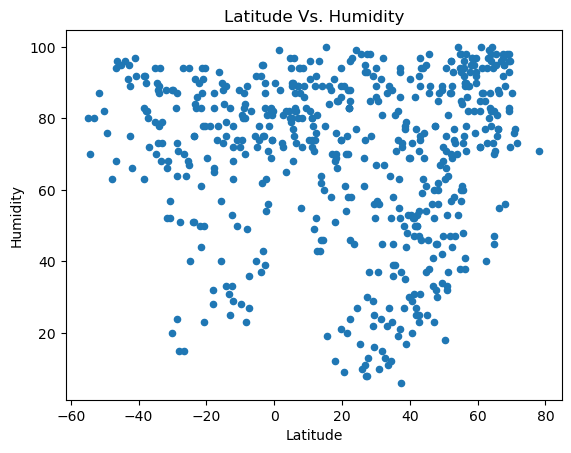

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y = "Humidity")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

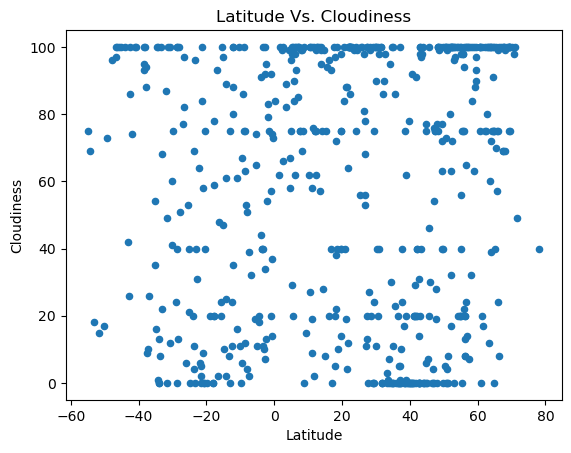

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", y = "Cloudiness")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

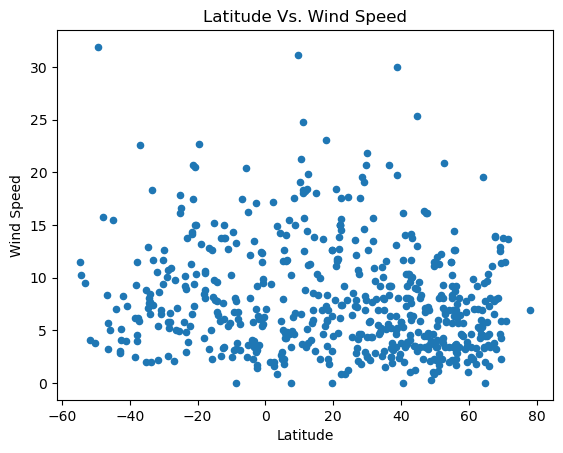

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", y = "Wind Speed")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def regression (x_values, y_values, annotate, ylabel, title): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress,"r-")
    plt.annotate(line_eq, annotate, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    correlation = pearsonr(x_values, y_values) #directly imported on cell 1 so does not need st. 
    print(f"{correlation}.")

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()
northern_hemi_df.count()

City          403
Lat           403
Lng           403
Max Temp      403
Humidity      403
Cloudiness    403
Wind Speed    403
Country       403
Date          403
dtype: int64

In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()
southern_hemi_df.count()

City          169
Lat           169
Lng           169
Max Temp      169
Humidity      169
Cloudiness    169
Wind Speed    169
Country       163
Date          169
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

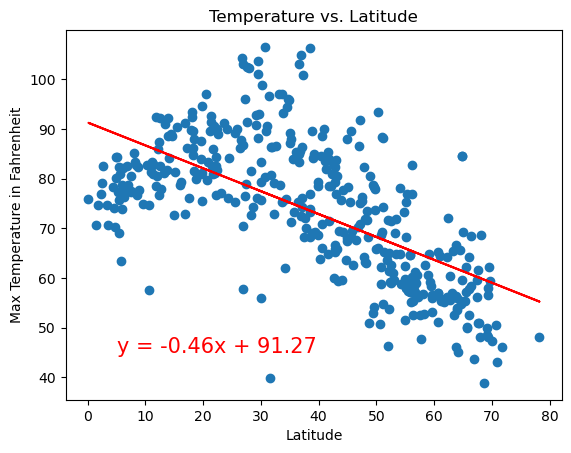

PearsonRResult(statistic=-0.6408197329766083, pvalue=5.6452427507519e-48).


In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
annotate = (5,45)
ylabel = "Max Temperature in Fahrenheit"
title = "Temperature vs. Latitude"
regression (x_values, y_values, annotate, ylabel, title)

# statistic close to -1 inverse relationship this ne is fairly strong
# pvalue is telling you how likely is it random chance, you want lower than 0.05 then small chances. this is way less than that so 
# the chances are likely correlated and not random

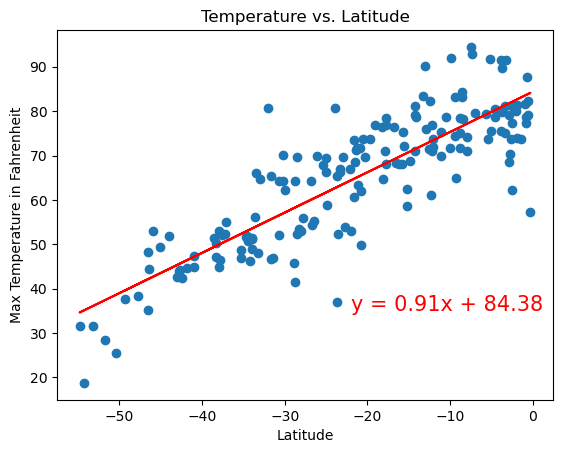

PearsonRResult(statistic=0.8499590238750996, pvalue=2.4049883247938977e-48).


In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
annotate = (-22, 35)
ylabel = "Max Temperature in Fahrenheit"
title = "Temperature vs. Latitude"
regression (x_values, y_values, annotate, ylabel, title)

**Discussion about the linear relationship:** There is a strong correlation between the distance to the equator and maximum tempoerature. This means the higher the temperature, the closer to the equator. The p value also indicates this correlation is not by random chance.  

### Humidity vs. Latitude Linear Regression Plot

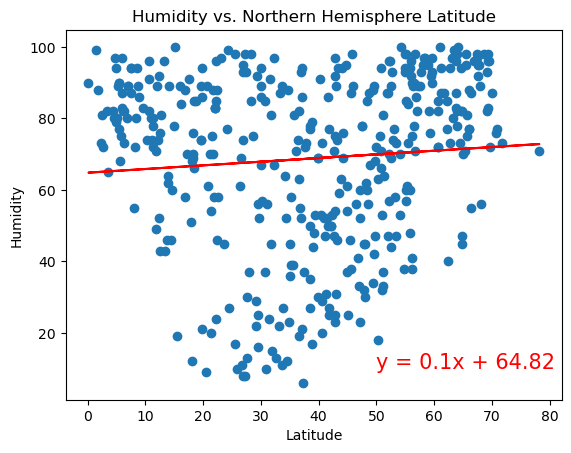

PearsonRResult(statistic=0.08113543335394557, pvalue=0.10386341494448319).


In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
annotate = (50,10)
ylabel = "Humidity"
title = "Humidity vs. Northern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

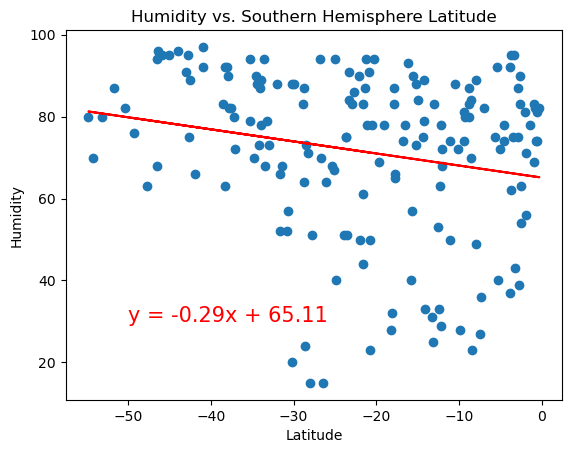

PearsonRResult(statistic=-0.20862211747352122, pvalue=0.006489279799348467).


In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
annotate = (-50,30)
ylabel = "Humidity"
title = "Humidity vs. Southern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

**Discussion about the linear relationship:** There is a weak negative correlation between humidity and latitude for both, nothern and southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

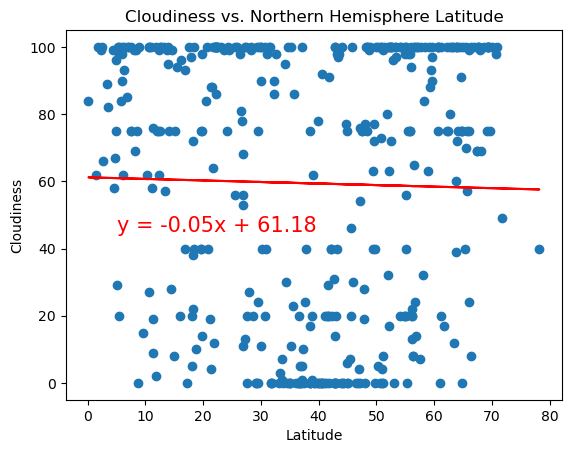

Correlation is PearsonRResult(statistic=-0.022348837097515714, pvalue=0.6546497576780707).


In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
annotate = (5,45)
ylabel = "Cloudiness"
title = "Cloudiness vs. Northern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

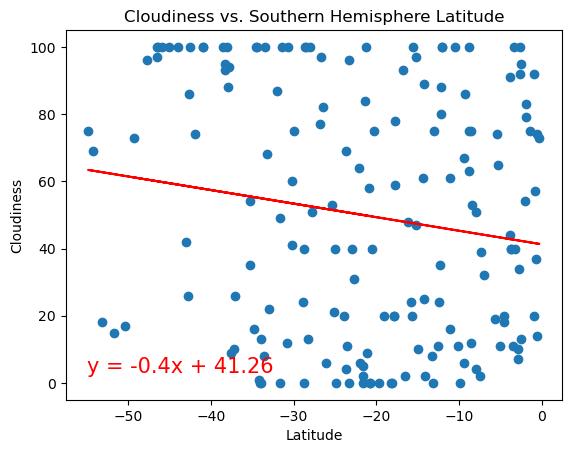

Correlation is PearsonRResult(statistic=-0.1571169074428683, pvalue=0.041345454297664105).


In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
annotate = (-55, 3)
ylabel = "Cloudiness"
title = "Cloudiness vs. Southern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

**Discussion about the linear relationship:** There is not a significant correlation regarding cloudiness and latitude for either southern or nothern hemisphere. However, it would be interesting to see the cloudiness and the longitude correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

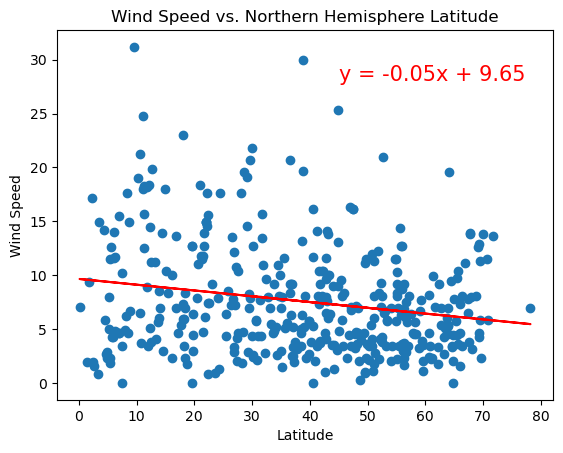

Correlation is PearsonRResult(statistic=-0.199693040911891, pvalue=5.411792240086797e-05).


In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
annotate = (45,28)
ylabel = "Wind Speed"
title = "Wind Speed vs. Northern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

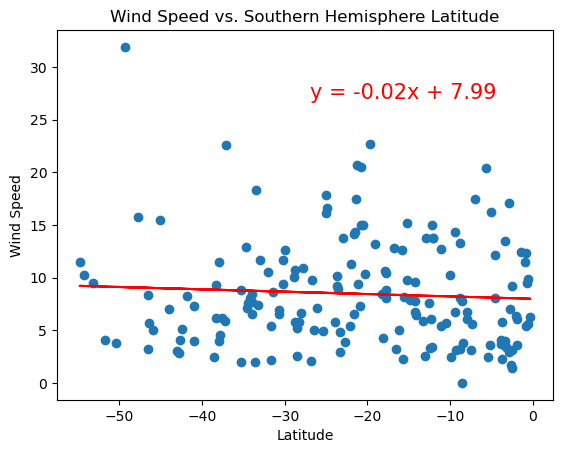

Correlation is PearsonRResult(statistic=-0.062969338556844, pvalue=0.41602686757771246).


In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
annotate = (-27,27)
ylabel = "Wind Speed"
title = "Wind Speed vs. Southern Hemisphere Latitude"
regression (x_values, y_values, annotate, ylabel, title)

**Discussion about the linear relationship:** There is a weak, negative correlation between wind speed and latitude for both, southern and nothern hemispheres. 